# end to end project in classification on heart skorks

# end to end project in classification on heart skorks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
ds=pd.read_csv("Downloads\stroke prediction (1).csv")
ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
ds.shape

(43400, 12)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
ds["gender"].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [6]:
ds["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [7]:
ds["heart_disease"].unique()

array([0, 1], dtype=int64)

In [8]:
ds["smoking_status"].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [57]:
ds["stroke"].value_counts()

0    42606
1      783
Name: stroke, dtype: int64

In [9]:
ds.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
ds=ds[ds["gender"]!="Other"]
ds.shape

(43389, 12)

In [11]:
#EDA and Visuliazation
ds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,41931.000000,43389.000000
mean,36326.360760,42.219747,0.093595,0.047524,104.486760,28.605156,0.018046
std,21073.474716,22.520750,0.291268,0.212758,43.115157,7.770186,0.133119
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18034.000000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36352.000000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54516.000000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


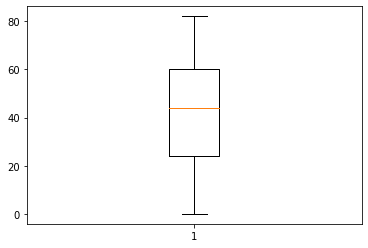

In [12]:
plt.boxplot(ds["age"])
plt.show()

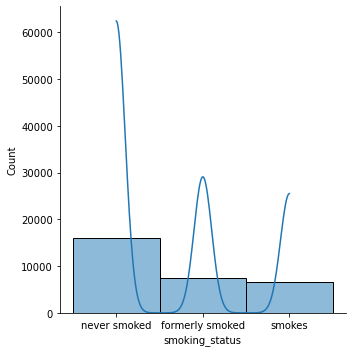

In [13]:
sns.displot(ds["smoking_status"],bins=10,kde=True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='gender'>

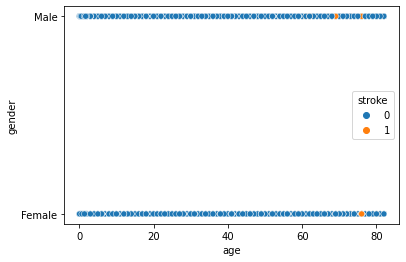

In [14]:
sns.scatterplot(x="age",y="gender",hue="stroke",data=ds)

<AxesSubplot:xlabel='age', ylabel='gender'>

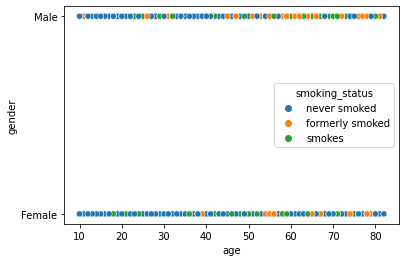

In [15]:
sns.scatterplot(x="age",y="gender",hue="smoking_status",data=ds)

<AxesSubplot:xlabel='age', ylabel='gender'>

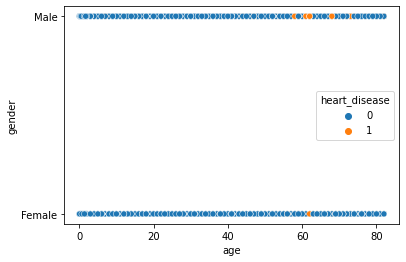

In [16]:
sns.scatterplot(x="age",y="gender",hue="heart_disease",data=ds)

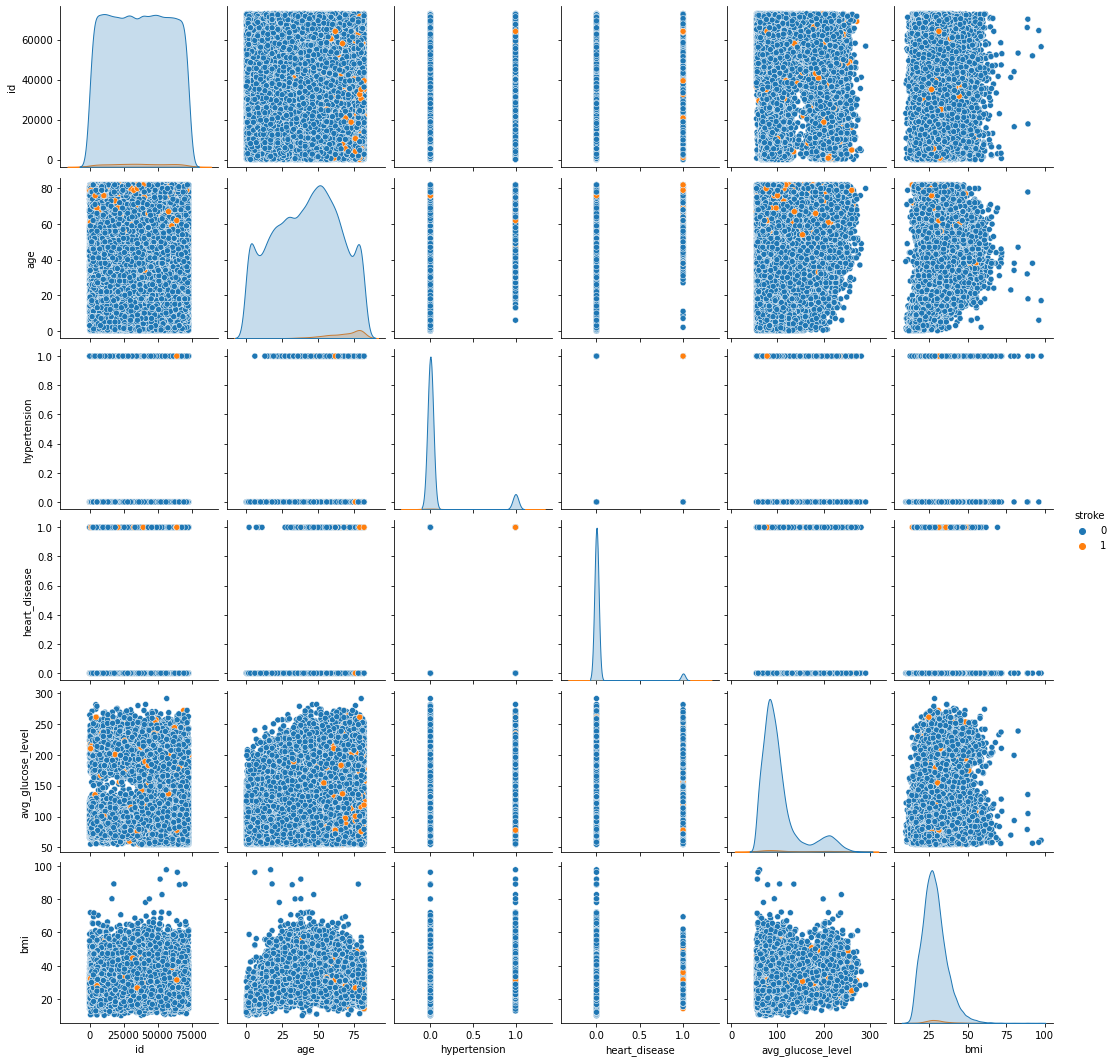

In [37]:
sns.pairplot(ds,hue="stroke")

<AxesSubplot:xlabel='stroke', ylabel='count'>

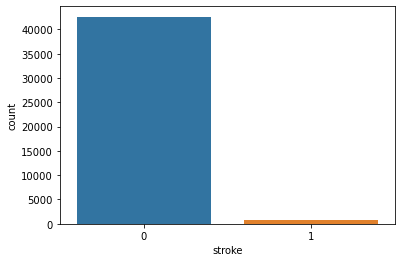

In [38]:
sns.countplot(x="stroke",data=ds)

In [39]:
ds.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

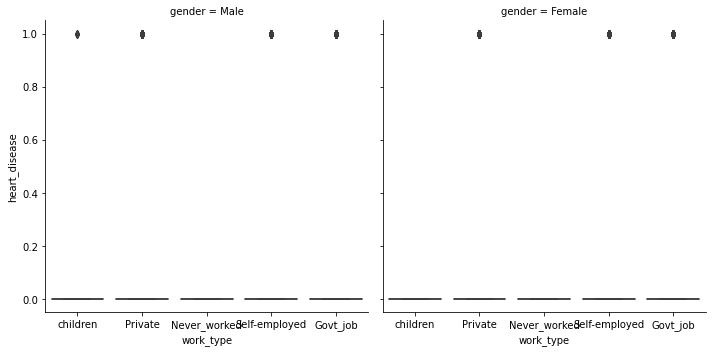

In [40]:
sns.catplot(x="work_type",y="heart_disease",data=ds,kind="box",col="gender")
plt.show()

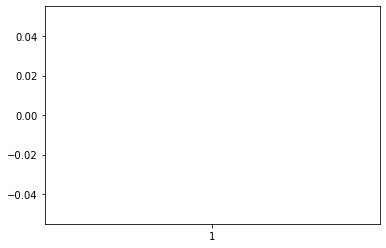

In [42]:
plt.boxplot(ds["bmi"])
plt.show()

# feature engineering 

In [43]:
#encoding 
pd.get_dummies(ds,drop_first=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,1,0,0,0,0,1,0,0,0
1,30468,58.0,1,0,87.96,39.2,0,1,1,0,1,0,0,1,1,0
2,16523,8.0,0,0,110.89,17.6,0,0,0,0,1,0,0,1,0,0
3,56543,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,0,0
4,46136,14.0,0,0,161.28,19.1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0,0,0,0,0,0,1,1,1,0
43396,5450,56.0,0,0,213.61,55.4,0,0,1,0,0,0,0,1,0,0
43397,28375,82.0,1,0,91.94,28.9,0,0,1,0,1,0,0,1,0,0
43398,27973,40.0,0,0,99.16,33.2,0,1,1,0,1,0,0,1,1,0


In [44]:
x=pd.get_dummies(ds.drop("stroke",axis=1),drop_first=True)

In [45]:
y=ds["stroke"]

In [46]:
x

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,1,0,0,0,0,1,0,0,0
1,30468,58.0,1,0,87.96,39.2,1,1,0,1,0,0,1,1,0
2,16523,8.0,0,0,110.89,17.6,0,0,0,1,0,0,1,0,0
3,56543,70.0,0,0,69.04,35.9,0,1,0,1,0,0,0,0,0
4,46136,14.0,0,0,161.28,19.1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0,0,0,0,0,1,1,1,0
43396,5450,56.0,0,0,213.61,55.4,0,1,0,0,0,0,1,0,0
43397,28375,82.0,1,0,91.94,28.9,0,1,0,1,0,0,1,0,0
43398,27973,40.0,0,0,99.16,33.2,1,1,0,1,0,0,1,1,0


In [47]:
x["bmi"].fillna(x["bmi"].median(),inplace=True)
x

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,1,0,0,0,0,1,0,0,0
1,30468,58.0,1,0,87.96,39.2,1,1,0,1,0,0,1,1,0
2,16523,8.0,0,0,110.89,17.6,0,0,0,1,0,0,1,0,0
3,56543,70.0,0,0,69.04,35.9,0,1,0,1,0,0,0,0,0
4,46136,14.0,0,0,161.28,19.1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0,0,0,0,0,1,1,1,0
43396,5450,56.0,0,0,213.61,55.4,0,1,0,0,0,0,1,0,0
43397,28375,82.0,1,0,91.94,28.9,0,1,0,1,0,0,1,0,0
43398,27973,40.0,0,0,99.16,33.2,1,1,0,1,0,0,1,1,0


In [48]:
x.isnull().sum()

id                             0
age                            0
hypertension                   0
heart_disease                  0
avg_glucose_level              0
bmi                            0
gender_Male                    0
ever_married_Yes               0
work_type_Never_worked         0
work_type_Private              0
work_type_Self-employed        0
work_type_children             0
Residence_type_Urban           0
smoking_status_never smoked    0
smoking_status_smokes          0
dtype: int64

In [49]:
x["age"].skew()

-0.10259240868991272

In [50]:
x["hypertension"].skew()

2.7907189850451526

In [51]:
x["heart_disease"].skew()

4.253626427827204

In [52]:
x["avg_glucose_level"].skew()

1.675196719432056

In [53]:
x["bmi"].skew()

0.9255830885187164

In [54]:
x["ever_married_Yes"].skew()

-0.6005066819642851

In [55]:
x["work_type_Never_worked"].skew()

15.561376299790554

In [56]:
x["work_type_Private"].skew()

-0.2918512672681848

In [58]:
x["work_type_Self-employed"].skew()

1.8902854019157482

In [59]:
x["work_type_children"].skew()

2.053314966367851

In [60]:
x["Residence_type_Urban"].skew()

-0.005208891190208918

In [61]:
x["smoking_status_never smoked"].skew()

0.538839125300817

In [65]:
x["smoking_status_smokes"].skew()


1.9471988528130253

In [77]:
x["smoking_status_smokes_x"]=x["smoking_status_smokes"]**(0)
x["smoking_status_smokes_x"].skew()

0

In [83]:
x=pd.get_dummies(ds.drop("stroke",axis=1),drop_first=True)

In [84]:
y=ds["stroke"]

In [85]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [86]:
#scaling use here standardscaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [87]:
from sklearn.linear_model import LogisticRegression 

log_model=LogisticRegression()


log_model.fit(x_train,y_train)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').